<a href="https://colab.research.google.com/github/myappcubic/leet-code-problem-set/blob/main/Graph_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages for Visulization

In [ ]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


## Just A simple Visualization

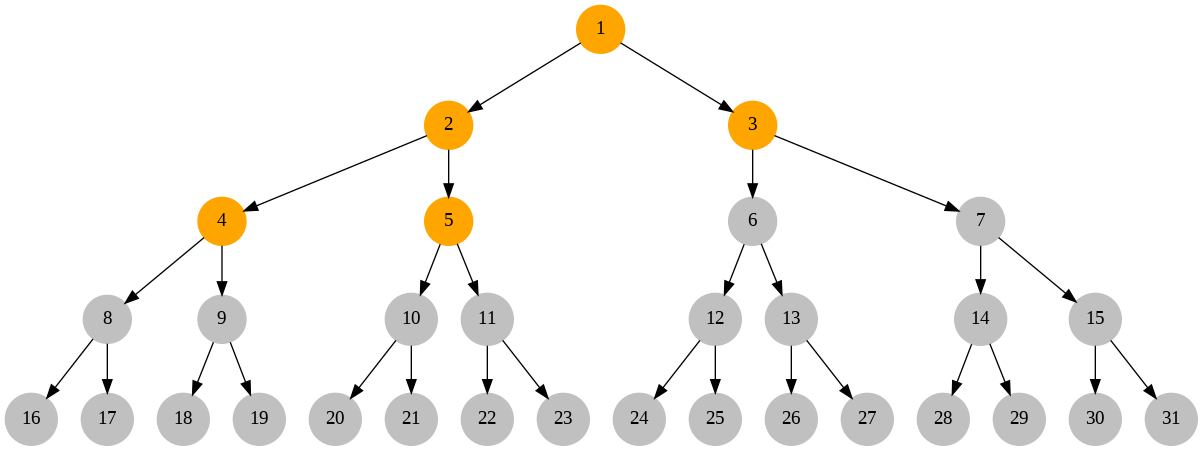

KeyboardInterrupt: 

In [ ]:
import graphviz
from collections import deque
from IPython.display import Image, display, clear_output
import time

class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def add_edges(graph, root, visited=set()):
    if root is not None:
        if root.left is not None:
            graph.edge(str(root.val), str(root.left.val))
            add_edges(graph, root.left, visited)
        if root.right is not None:
            graph.edge(str(root.val), str(root.right.val))
            add_edges(graph, root.right, visited)

def visualize_tree(root, visited):
    graph = graphviz.Digraph()
    nodes_to_visit = deque([root])
    while nodes_to_visit:
        node = nodes_to_visit.popleft()
        if node:
            color = "orange" if node in visited else "gray"
            graph.node(str(node.val), str(node.val), color=color, style='filled', fillcolor=color, shape="circle")
            if node.left:
                nodes_to_visit.append(node.left)
            if node.right:
                nodes_to_visit.append(node.right)
    add_edges(graph, root, visited)
    return graph

def create_tree_with_height(height):
    root = TreeNode(1)
    current_level = [root]
    value = 2
    for _ in range(height):
        next_level = []
        for node in current_level:
            node.left = TreeNode(value)
            value += 1
            node.right = TreeNode(value)
            value += 1
            next_level.extend([node.left, node.right])
        current_level = next_level
    return root

def bfs_traversal_and_animation(root):
    if root is None:
        return []
    queue = deque([root])
    traversal = []
    visited = set()
    step = 0
    while queue:
        node = queue.popleft()
        traversal.append(node.val)
        visited.add(node)
        graph = visualize_tree(root, visited)
        graph.render(f'binary_tree_step_{step}', format='png')
        display(Image(filename=f'binary_tree_step_{step}.png'))
        time.sleep(1)
        clear_output(wait=True)
        step += 1
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return traversal

# Create and visualize a binary tree with height 4
root = create_tree_with_height(4)

# Perform BFS traversal with animation
traversal_result = bfs_traversal_and_animation(root)
print("BFS Traversal:", traversal_result)

# Create a tree object and then perform traversal

Define a Tree

In [ ]:
class Tree:
  def __init__(self, key):
    self.left = None;
    self.right = None;
    self.val = key;

In [ ]:
arr = [1, 2, 3, 4, 5, 6, 7]

In [ ]:
def insert_level_order(root, arr, i):
  if i < len(arr):
    temp = Tree(arr[i])
    root = temp

    root.left = insert_level_order(root.left, arr, 2 * i + 1)
    root.right = insert_level_order(root.right, arr, 2 * i + 2)

  return root

In [ ]:
root = insert_level_order(None, arr, 0)

In [ ]:
root.left.right.val

5

In [ ]:
def in_order_traveral(root):
  if root:
    in_order_traveral(root.left)
    print(root.val, end = " ")
    in_order_traveral(root.right)

In [ ]:
def pre_order_list(root):
  stack = [root]
  result = []
  while stack:
    current_node = stack.pop()
    result.append(current_node.val)
    if current_node:
      if current_node.right:
        stack.append(current_node.right)
      if current_node.left:
        stack.append(current_node.left)
  print(result)

pre_order_list(root)

[1, 2, 4, 5, 3, 6, 7]


## Pre Order Traversal


In [ ]:
def pre_order_iter_simple(root):
  result = []
  stack = [root]
  while stack:
    current = stack.pop()
    result.append(current.val)
    if current.right:
      stack.append(current.right)
    if current.left:
      stack.append(current.left)
  print(result)

pre_order_iter_simple(root)

[1, 2, 4, 5, 3, 6, 7]


In [ ]:
def pre_order_list(root):
  stack = []
  result = []
  curr = root
  while curr or stack:
    if curr:
      result.append(curr.val)
      if curr.right:
        stack.append(curr.right)
      curr = curr.left
    else:
      curr = stack.pop()


    #   # Push right child first so that left child is processed first
    #   if curr.right:
    #     stack.append(curr.right)
    #   curr = curr.left
    # else:
    #   curr = stack.pop()

  print(result)


pre_order_list(root)

[1, 2, 4, 5, 3, 6, 7]


## In Order Traversal
use an additional pointer

left -> current -> right

In [ ]:
def in_order_iter(root):
  if not root:
    print("[]")
    return
  res = []
  curr = root
  stack = []
  while curr or stack:
    # ensure always push valid node into stack
    if curr:
      stack.append(curr)
      curr = curr.left
    else:
      curr = stack.pop()
      res.append(curr.val)
      curr = curr.right
  print(res)
in_order_iter(root)

[4, 2, 8, 5, 1, 6, 9, 3, 7]


### Morris Traversal

1. **Initial Check**
> In human language, because it follows left -> curr -> right, if curr no left, it ***has*** to be curr

  - If `curr` has no left child (`not curr.left`), the `value` of `curr` is appended to result, and curr is moved to its right child (curr = curr.right).

2. **Find the Predecessor**
> what is a `pre`? In human language, its **the last node it visits before** visiting the `cur`

  - If curr has a `left` child, find the inorder `predecessor` (pre). This is done by moving to the left child (curr.left) and then continuously to the rightmost node in that subtree (pre.right).

3. **Link to Current:**

  - If the *right child of the predecessor is None* (`not pre.right`), create a temp link back to `curr` by setting `pre.right = curr`. Then, move curr to its left child (`curr = curr.left`).

4. **Break the Link:**

  - If the right child of the predecessor is curr (`pre.right == curr`), it indicates the **left subtree has been fully traversed**. The temporary link is removed by setting `pre.right = None`, the value of curr is appended to result, and curr is moved to its right child (`curr = curr.right`).

In [ ]:
def in_order_moris_rewrite(root):
  cur = root
  res = []
  while cur:
    if not cur.left:
      res.append(cur.val)
      cur = cur.right
    else:
      pre = cur.left
      while pre.right and pre.right != cur:
        pre = pre.right
      if not pre.right:
        pre.right = cur
        cur = cur.left
      else:
        pre.right = None
        res.append(cur.val)
        cur = cur.right
  print(res)

in_order_moris_rewrite(root)

[4, 2, 8, 5, 1, 6, 9, 3, 7]


In [ ]:
def in_order_iter_stack(root):
  result = []
  stack = []
  curr = root
  while stack or curr:
    if curr:
      stack.append(curr)
      curr = curr.left
    else:
      curr = stack.pop()
      result.append(curr.val)
      curr = curr.right
    print(result)

in_order_iter_stack(root)

[]
[]
[]
[4]
[4, 2]
[4, 2]
[4, 2, 5]
[4, 2, 5, 1]
[4, 2, 5, 1]
[4, 2, 5, 1]
[4, 2, 5, 1, 6]
[4, 2, 5, 1, 6, 3]
[4, 2, 5, 1, 6, 3]
[4, 2, 5, 1, 6, 3, 7]


In [ ]:
root.val

1

In [ ]:
def in_order_list(root):
  result = []
  stack = []
  current = root
  while stack or current:
    while current:
      stack.append(current)
      current = current.left
    current = stack.pop()
    result.append(current.val)
    current = current.right
  print(result)

in_order_list(root)

[4, 2, 5, 1, 6, 3, 7]


## Post Order Traversal

### Reverse Logic from Pre Order Traversal

In [ ]:
def post_order_iter_rev(root):
  if not root:
    return
  res = []
  stack = [root]
  while stack:
    for (index, item) in enumerate(stack):
      print(item.val, end=(" "))
    print("\n ----{}---items".format(index+1), end="\n")
    current_node = stack.pop()
    # current_node is always valid because we DO NOT append None
    res.append(current_node.val)
    if current_node:
      if current_node.left:
        stack.append(current_node.left)
      if current_node.right:
        stack.append(current_node.right)
  print(res[::-1])

post_order_iter_rev(root)

1 
 ----1---items
2 3 
 ----2---items
2 6 7 
 ----3---items
2 6 
 ----2---items
2 
 ----1---items
4 5 
 ----2---items
4 
 ----1---items
[4, 5, 2, 6, 7, 3, 1]


### Peek the Top of the Stack
and follow the `right` `center` `left` order

In [ ]:
def post_order_iter_peek(root):
  if not root:
    return
  current_node = root
  stack = []
  result = []
  last_visited = None
  while current_node or stack:
    if current_node:
      stack.append(current_node)
      current_node = current_node.left
    else:
      peek_stack = stack[-1]
      if peek_stack.right and peek_stack.right != last_visited:
        current_node = peek_stack.right
      else:
        result.append(peek_stack.val)
        last_visited = stack.pop()
  print(result)
post_order_iter_peek(root)

[4, 5, 2, 6, 7, 3, 1]


In [ ]:
# def post_order_list(root):
#   stack = [root]
#   result = []
#   while stack:
#     current_node = stack.pop()
#     result.append(current_node.val)
#     if current_node:

#       if current_node.left:
#         stack.append(current_node.left)
#       if current_node.right:
#         stack.append(current_node.right)
#   print(result[::-1])

def post_order_list(root):
  stack = []
  result = []
  curr = root
  last_visited = None
  while stack or curr:
    if curr:
      stack.append(curr)
      curr = curr.left
    else:
      peek = stack[-1]
      if peek.right and peek.right != last_visited:
        curr = peek.right
      else:
        result.append(peek.val)
        last_visited = stack.pop()
  print(result)

post_order_list(root)

[4, 5, 2, 6, 7, 3, 1]


In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def bfs(root):
    if not root:
        return

    current_layer = [root]
    next_layer = []

    while current_layer:
        while current_layer:
            curr = current_layer.pop()
            print(curr.val)
            if curr.left:
                next_layer.append(curr.left)
            if curr.right:
                next_layer.append(curr.right)

        if next_layer:
            print("another level")
            current_layer, next_layer = next_layer, []

# Example binary tree construction
#         1
#        / \
#       2   3
#      /|   |\
#     4 5   6 7
#      /     \
#     8       9
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)
root.left.right.left = TreeNode(8)
root.right.left.right = TreeNode(9)

bfs(root)

1
another level
3
2
another level
5
4
7
6
another level
9
8


In [ ]:
from collections import deque

def bfs(root):
    queue = deque([root])
    while queue:
        node = queue.popleft()
        print(node.val)
        if node.right:
            queue.append(node.right)
        if node.left:
            queue.append(node.left)


bfs(root)

1
3
2
7
6
5
4
9
8


In [ ]:
queue.insert(0, 4)

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def bfs(root):
    if not root:
        return

    current_layer = [root]
    next_layer = []

    while current_layer:
        level_values = []

        while current_layer:
            node = current_layer.pop()
            level_values.append(str(node.val))
            if node.right:
                next_layer.append(node.right)
            if node.left:
                next_layer.append(node.left)



        print(" ".join(level_values))

        if next_layer:
            current_layer = next_layer[::-1]  # Reverse the next layer
            next_layer = []

# Example binary tree construction
#         1
#        / \
#       2   3
#      /|   |\
#     4 5   6 7
#      /     \
#     8       9
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)
root.left.right.left = TreeNode(8)
root.right.left.right = TreeNode(9)

bfs(root)

1
3 2
7 6 5 4
9 8


#### Re-implement Morris

In [ ]:
# Example binary tree construction
#         1
#        / \
#       2   3
#      /|   |\
#     4 5   6 7
#      /     \
#     8       9

In [ ]:
def pre_order(root):
    res, stack, cur = [],[], root
    while stack or cur:
        print([node.val for node in stack], res, cur.val if cur else None)
        if cur:
            res.append(cur.val)
            stack.append(cur)
            cur = cur.left
        else:
            cur = stack.pop()
            cur = cur.right
    print(res)
pre_order(root)

[] [] 1
[1] [1] 2
[1, 2] [1, 2] 4
[1, 2, 4] [1, 2, 4] None
[1, 2] [1, 2, 4] None
[1] [1, 2, 4] 5
[1, 5] [1, 2, 4, 5] 8
[1, 5, 8] [1, 2, 4, 5, 8] None
[1, 5] [1, 2, 4, 5, 8] None
[1] [1, 2, 4, 5, 8] None
[] [1, 2, 4, 5, 8] 3
[3] [1, 2, 4, 5, 8, 3] 6
[3, 6] [1, 2, 4, 5, 8, 3, 6] None
[3] [1, 2, 4, 5, 8, 3, 6] 9
[3, 9] [1, 2, 4, 5, 8, 3, 6, 9] None
[3] [1, 2, 4, 5, 8, 3, 6, 9] None
[] [1, 2, 4, 5, 8, 3, 6, 9] 7
[7] [1, 2, 4, 5, 8, 3, 6, 9, 7] None
[1, 2, 4, 5, 8, 3, 6, 9, 7]


In [ ]:
def post_order_traversal(root):
    res = []
    stack = []
    cur = root
    last = None
    while stack or cur:
        if cur:
            stack.append(cur)
            cur = cur.left
        else:
            peek = stack[-1]
            if peek.right and peek.right != last:
                cur = peek.right
            else:
                res.append(peek.val)
                last = stack.pop()

    print(res)


post_order_traversal(root)

[4, 8, 5, 2, 9, 6, 7, 3, 1]


In [ ]:
def in_order_traversal(root):
    res, stack = [],[]
    cur = root
    while cur or stack:
        if cur:
            stack.append(cur)
            cur = cur.left
        else:
            cur = stack.pop()
            res.append(cur.val)
            cur = cur.right
    print(res)

in_order_traversal(root)


[4, 2, 8, 5, 1, 6, 9, 3, 7]


## Graph Traversal

In [ ]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

### BFS Iterative

In [ ]:
from collections import deque
def bfs_iterative(graph, started):
    queue = deque([started])
    visited = set()
    visited.add(started)

    while queue:
        vertex = queue.popleft()
        print(vertex, end=" ")
        for neighbor in graph[vertex]:
            if not neighbor in visited:
                visited.add(neighbor)
                queue.append(neighbor)
bfs_iterative(graph, 'A')

A B C D E F 

In [ ]:
def bfs_recursive(graph, queue, visited):
    print("{},{}".format(visited, queue))
    if not queue:
        return

    for neighbor in graph[vertex]:
        if neighbor not in visited:
            visited.add(neighbor)
            queue.append(neighbor)

    vertex = queue.popleft()
    print(vertex, end=' ')



    bfs_recursive(graph, queue, visited)
bfs_recursive(graph, deque(['A']), set(['A']))

{'A'},deque(['A'])


UnboundLocalError: local variable 'vertex' referenced before assignment

# Graph Traversal

## Union Find

In [79]:
class UnionFindRecursive:
    def __init__(self, size):
        self.parent = list(range(size))

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x != root_y:
            self.parent[root_y] = root_x

class UnionFindIterative:
    def __init__(self, size):
        self.parent = list(range(size))

    def find(self, x):
        root = x
        while self.parent[root] != root:
            root = self.parent[root]

        # Path compression
        while x != root:
            next_x = self.parent[x]
            self.parent[x] = root
            x = next_x

        return root

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x != root_y:
            self.parent[root_y] = root_x

class UnionFindPathSplitting:
    def __init__(self, size):
        self.parent = list(range(size))

    def find(self, x):
        while self.parent[x] != x:
            self.parent[x], x = self.parent[self.parent[x]], self.parent[x]
        return x

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x != root_y:
            self.parent[root_y] = root_x

In [81]:
import time
import random

def test_performance(UnionFindClass, size, operations):
    uf = UnionFindClass(size)
    start_time = time.time()
    for _ in range(operations):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        uf.union(x, y)
        uf.find(random.randint(0, size-1))
    return time.time() - start_time

size = 10000
operations = 100000

recursive_time = test_performance(UnionFindRecursive, size, operations)
iterative_time = test_performance(UnionFindIterative, size, operations)
path_splitting_time = test_performance(UnionFindPathSplitting, size, operations)

print(f"Recursive Path Compression time: {recursive_time:.4f} seconds")
print(f"Iterative Path Compression time: {iterative_time:.4f} seconds")
print(f"Path Splitting time: {path_splitting_time:.4f} seconds")

Recursive Path Compression time: 0.5051 seconds
Iterative Path Compression time: 0.6650 seconds
Path Splitting time: 0.8821 seconds


In [78]:
uf.union(0, 1)
uf.union(2, 3)
uf.union(4, 5)
uf.union(6, 7)
uf.union(8, 9)
uf.union(1, 5)
uf.union(5, 7)
uf.parent

[0, 0, 2, 2, 0, 0, 0, 6, 8, 8]

In [73]:
for i in range(10):
    print(f"Root of {i}: {uf.find(i)}")

Root of 0: 0
Root of 1: 0
Root of 2: 2
Root of 3: 2
Root of 4: 0
Root of 5: 0
Root of 6: 0
Root of 7: 0
Root of 8: 8
Root of 9: 8
